In [1]:
#ARQUIVO_ENTRADA="dados/dados_teste.txt"
ARQUIVO_ENTRADA="/tmp/dsexample1/dados/COTAHIST_A2020.TXT"

In [86]:
from carregador_dados import le_arquivo 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
gerador_arquivo = le_arquivo(ARQUIVO_ENTRADA, pula_header=True) 
dados = np.array(list(gerador_arquivo))

In [3]:
dados[:10]

array([[datetime.date(2020, 1, 2), 'AALR3', 18.68],
       [datetime.date(2020, 1, 2), 'AAPL34', 120.73],
       [datetime.date(2020, 1, 2), 'ABCB4', 20.05],
       [datetime.date(2020, 1, 2), 'ABEV3', 19.12],
       [datetime.date(2020, 1, 2), 'ADHM3', 2.44],
       [datetime.date(2020, 1, 2), 'AFLT3', 11.15],
       [datetime.date(2020, 1, 2), 'AGRO3', 19.21],
       [datetime.date(2020, 1, 2), 'ALPA3', 27.17],
       [datetime.date(2020, 1, 2), 'ALPA4', 32.74],
       [datetime.date(2020, 1, 2), 'ALSO3', 50.13]], dtype=object)

In [4]:
dados[:10, 1:3]

array([['AALR3', 18.68],
       ['AAPL34', 120.73],
       ['ABCB4', 20.05],
       ['ABEV3', 19.12],
       ['ADHM3', 2.44],
       ['AFLT3', 11.15],
       ['AGRO3', 19.21],
       ['ALPA3', 27.17],
       ['ALPA4', 32.74],
       ['ALSO3', 50.13]], dtype=object)

In [5]:
len(dados)

666572

In [6]:
type(dados)

numpy.ndarray

In [7]:
s = pd.Series([2,7,5,10,6], index=["Wilfred", "Abbie", "Harry", "Julia", "Carrie"])

In [8]:
np.mean(s)

6.0

In [9]:
df = pd.DataFrame(dados, columns=["data pregao", "ativo", "preco medio"]).head(n=10000)

In [82]:
df

,data pregao,ativo,preco medio
0,2020-01-02,AALR3,18.68
1,2020-01-02,AAPL34,120.73
2,2020-01-02,ABCB4,20.05
3,2020-01-02,ABEV3,19.12
4,2020-01-02,ADHM3,2.44
...,...,...,...
9995,2020-01-15,IBOV11,116403
9996,2020-01-15,IDNT3,3.91
9997,2020-01-15,IDVL3,4.01
9998,2020-01-15,IDVL4,5.28


In [83]:
type(df)

pandas.core.frame.DataFrame

In [53]:
df.where(df['ativo'] == 'AALR3')

,data pregao,ativo,preco medio
0,2020-01-02,AALR3,18.68
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
9995,NaN,NaN,NaN
9996,NaN,NaN,NaN
9997,NaN,NaN,NaN
9998,NaN,NaN,NaN


In [84]:
type(df.where(df['ativo'] == 'AALR3'))

pandas.core.frame.DataFrame

In [54]:
df.where(df['ativo'] == 'AALR3').dropna()

,data pregao,ativo,preco medio
0,2020-01-02,AALR3,18.68
1036,2020-01-03,AALR3,18.95
2132,2020-01-06,AALR3,18.97
3399,2020-01-07,AALR3,18.95
4462,2020-01-08,AALR3,18.96
5553,2020-01-09,AALR3,19.19
6600,2020-01-10,AALR3,20.53
7704,2020-01-13,AALR3,21.45
8755,2020-01-14,AALR3,21.74
9785,2020-01-15,AALR3,21.66


In [52]:
df.sort_values(by="data pregao")

,data pregao,ativo,preco medio
0,2020-01-02,AALR3,18.68
682,2020-01-02,BRGE6F,12
683,2020-01-02,BRGE8F,15.11
684,2020-01-02,BRGE11F,15.82
685,2020-01-02,BRGE12F,8.44
...,...,...,...
9860,2020-01-15,BRSR3,23.3
9861,2020-01-15,BRSR6,20.76
9862,2020-01-15,BSEV3,4.28
9851,2020-01-15,BRDT3,28.4


In [15]:
df [ (df['ativo'] == 'WEGE3T') & (df["preco medio"] > 40)]

,data pregao,ativo,preco medio


In [16]:
df.dtypes

data pregao    object
ativo          object
preco medio    object
dtype: object

In [17]:
df.head()

,data pregao,ativo,preco medio
0,2020-01-02,AALR3,18.68
1,2020-01-02,AAPL34,120.73
2,2020-01-02,ABCB4,20.05
3,2020-01-02,ABEV3,19.12
4,2020-01-02,ADHM3,2.44


In [18]:
df.index.stop

10000

In [19]:
df.size

30000

In [43]:
def truncar(ativo):
    return ativo[:4]

df["ativo"].apply(truncar)

0       AALR
1       AAPL
2       ABCB
3       ABEV
4       ADHM
        ... 
9995    IBOV
9996    IDNT
9997    IDVL
9998    IDVL
9999    IGTA
Name: ativo, Length: 10000, dtype: object

In [45]:
df["preco medio"].apply(lambda x: x * 2)

0           37.36
1          241.46
2           40.10
3           38.24
4            4.88
          ...    
9995    232806.00
9996         7.82
9997         8.02
9998        10.56
9999       110.20
Name: preco medio, Length: 10000, dtype: float64

In [47]:
df.replace({"preco medio": {18.68: 20.47}} )

,data pregao,ativo,preco medio
0,2020-01-02,AALR3,20.47
1,2020-01-02,AAPL34,120.73
2,2020-01-02,ABCB4,20.05
3,2020-01-02,ABEV3,19.12
4,2020-01-02,ADHM3,2.44
...,...,...,...
9995,2020-01-15,IBOV11,116403.00
9996,2020-01-15,IDNT3,3.91
9997,2020-01-15,IDVL3,4.01
9998,2020-01-15,IDVL4,5.28


<AxesSubplot:ylabel='Frequency'>

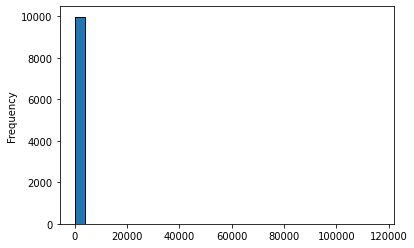

In [59]:
df["preco medio"].head(n=30).plot.hist(bins=30, edgecolor='black')

<AxesSubplot:>

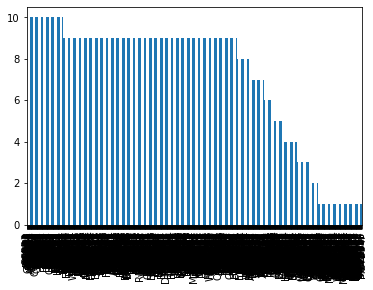

In [60]:
df["ativo"].value_counts().head(n=30).plot.bar()

<AxesSubplot:xlabel='preco medio', ylabel='ativo'>

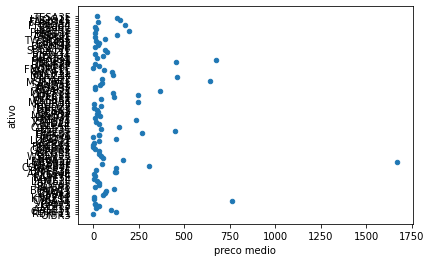

In [91]:
df.sample(frac=.01).plot.scatter(x='preco medio', y='ativo')

<AxesSubplot:title={'center':'Numero de precos por ativo'}>

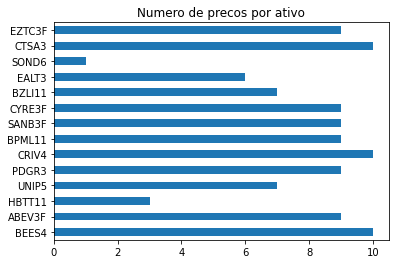

In [92]:
df["ativo"].value_counts().sample(frac=.01).plot.barh(title="Numero de precos por ativo")

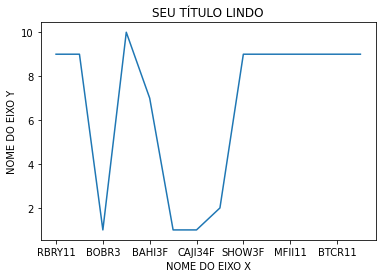

In [90]:
# Usando matplotlib
preco_por_ativo = df["ativo"].value_counts().sample(frac=.01)

preco_por_ativo.plot()
plt.title('SEU TÍTULO LINDO') #adicionando o título
plt.xlabel('NOME DO EIXO X')
plt.ylabel('NOME DO EIXO Y')
plt.show()